In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter

In [2]:
df = pd.read_csv("Customer_support_data.csv")
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


Preprocessing & EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [4]:
print("Before fill missing value")
df.isnull().sum()

Before fill missing value


Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

In [5]:
df['Customer Remarks'] = df['Customer Remarks'].fillna('No Remark')
df['Order_id'] = df['Order_id'].fillna('Unknown')
df['order_date_time'] = df['order_date_time'].fillna('Unknown')
df['Customer_City'] = df['Customer_City'].fillna('Unknown')
df['Product_category'] = df['Product_category'].fillna('Unknown')
df['Item_price'] = df['Item_price'].fillna(df['Item_price'].median())
df['connected_handling_time'] = df['connected_handling_time'].fillna(df['connected_handling_time'].median())

In [6]:
print("After fill missing value")
df.isnull().sum()

After fill missing value


Unique id                  0
channel_name               0
category                   0
Sub-category               0
Customer Remarks           0
Order_id                   0
order_date_time            0
Issue_reported at          0
issue_responded            0
Survey_response_Date       0
Customer_City              0
Product_category           0
Item_price                 0
connected_handling_time    0
Agent_name                 0
Supervisor                 0
Manager                    0
Tenure Bucket              0
Agent Shift                0
CSAT Score                 0
dtype: int64

In [7]:
df = df.drop_duplicates().reset_index(drop=True)
cat_cols = []
num_cols = []

for i in df.columns:
    if 'int' in str(df[i].dtype) or 'float' in str(df[i].dtype):
        num_cols.append(i)
    else:
        cat_cols.append(i)


In [8]:
cat_cols

['Unique id',
 'channel_name',
 'category',
 'Sub-category',
 'Customer Remarks',
 'Order_id',
 'order_date_time',
 'Issue_reported at',
 'issue_responded',
 'Survey_response_Date',
 'Customer_City',
 'Product_category',
 'Agent_name',
 'Supervisor',
 'Manager',
 'Tenure Bucket',
 'Agent Shift']

In [9]:
num_cols

['Item_price', 'connected_handling_time', 'CSAT Score']

In [10]:
for i in cat_cols:
    print(df[i].value_counts(),'\n')

Unique id
7e9ae164-6a8b-4521-a2d4-58f7c9fff13f    1
4a7fec30-68f5-4891-b934-6a666e00930e    1
67792991-fd16-465f-bbdc-3189a0f16395    1
c629cb55-3c2b-448c-8598-96eeb0f30f13    1
67f2636b-055f-4ae5-a360-c3f35c09205c    1
                                       ..
71c4d872-ed1a-4215-98fc-0753046c7637    1
8ae06ce2-ffd7-4c5f-9820-56226ec30275    1
52b3f399-ee61-41fa-b332-d830ab176977    1
4c9be137-c6ea-48ea-b80b-5b5dda67110d    1
07c7a878-0d5a-42e0-97ef-de59abec0238    1
Name: count, Length: 85907, dtype: int64 

channel_name
Inbound    68142
Outcall    14742
Email       3023
Name: count, dtype: int64 

category
Returns               44097
Order Related         23215
Refund Related         4550
Product Queries        3692
Shopzilla Related      2792
Payments related       2327
Feedback               2294
Cancellation           2212
Offers & Cashback       480
Others                   99
App/website              84
Onboarding related       65
Name: count, dtype: int64 

Sub-category
Reverse

In [11]:
df['order_date_time'] = pd.to_datetime(df['order_date_time'], errors='coerce')
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], errors='coerce')
df['Survey_response_Date'] = pd.to_datetime(df['Survey_response_Date'], errors='coerce')

C:\Users\olive\AppData\Local\Temp\ipykernel_29280\1128956543.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_date_time'] = pd.to_datetime(df['order_date_time'], errors='coerce')
C:\Users\olive\AppData\Local\Temp\ipykernel_29280\1128956543.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Survey_response_Date'] = pd.to_datetime(df['Survey_response_Date'], errors='coerce')


In [12]:
df['response_delay_hours'] = ((df['Survey_response_Date'] - df['Issue_reported at']).dt.total_seconds() / 3600)

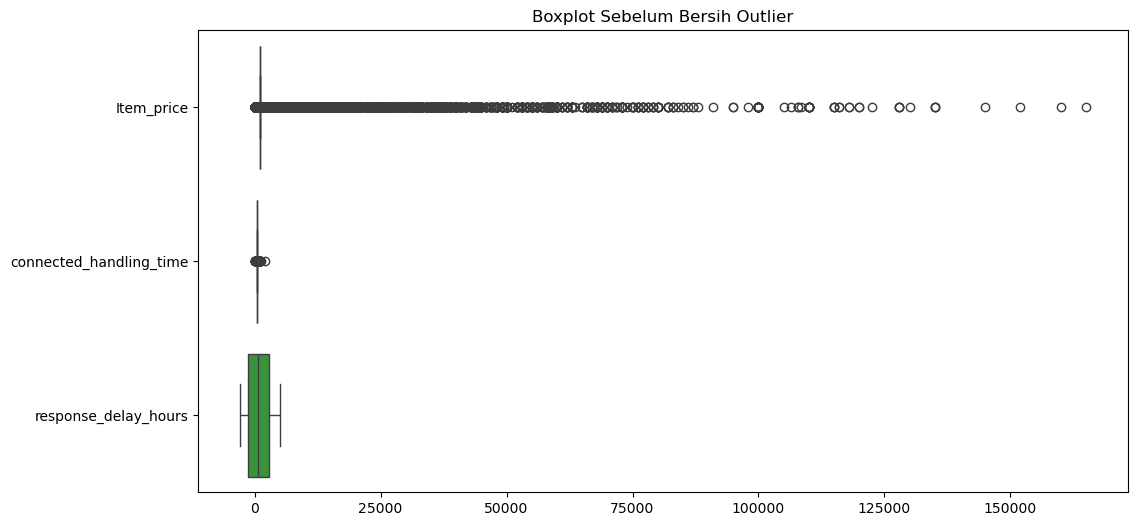

In [13]:
num_cols_outlier = ['Item_price', 'connected_handling_time', 'response_delay_hours']

plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols_outlier], orient='h')
plt.title("Boxplot Sebelum Bersih Outlier")
plt.show()

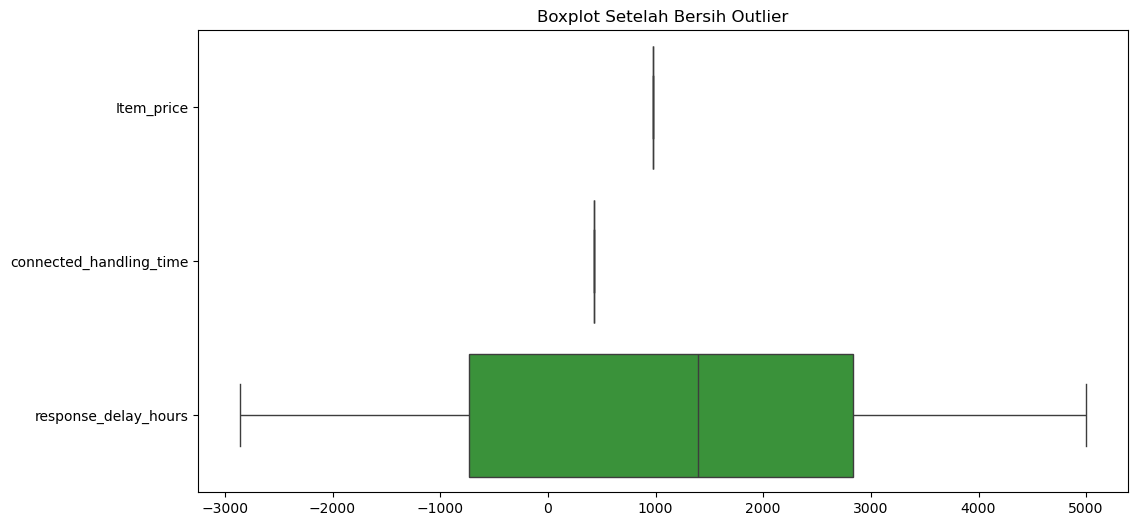

In [14]:
for col in num_cols_outlier:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols_outlier], orient='h')
plt.title("Boxplot Setelah Bersih Outlier")
plt.show()

Distribution of CSAT Score

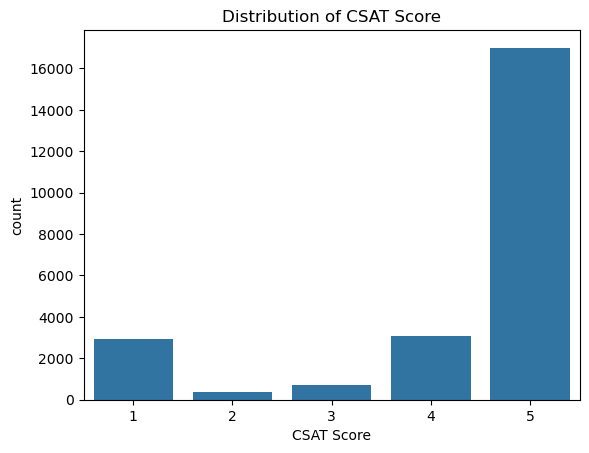

In [15]:
sns.countplot(x='CSAT Score', data=df)
plt.title('Distribution of CSAT Score')
plt.show()

Relationship between CSAT Score and Handling Time

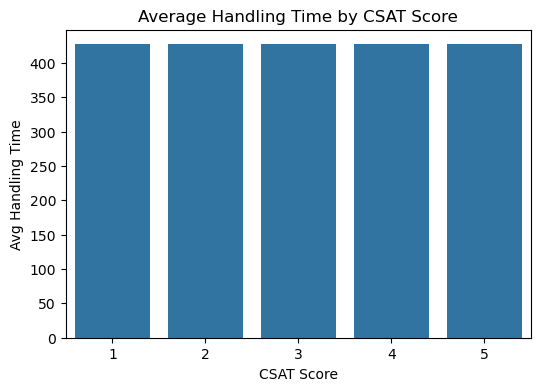

In [16]:
plt.figure(figsize=(6,4))
sns.barplot(
    x='CSAT Score',
    y='connected_handling_time',
    data=df,
    estimator=np.mean
)
plt.title('Average Handling Time by CSAT Score')
plt.ylabel('Avg Handling Time')
plt.show()

Item Price Distribution by CSAT Score

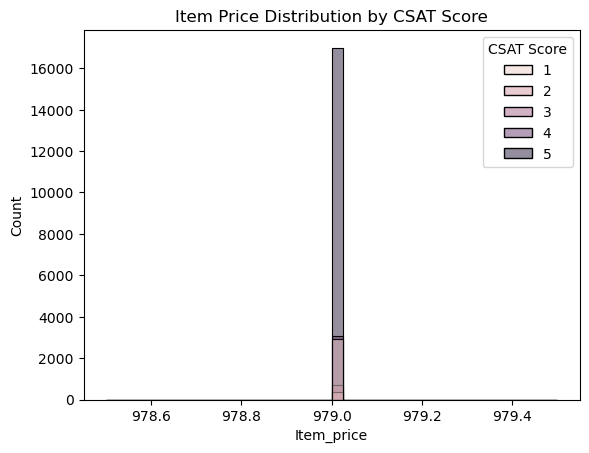

In [17]:
sns.histplot(
    data=df,
    x='Item_price',
    hue='CSAT Score',
    bins=40
)
plt.title('Item Price Distribution by CSAT Score')
plt.show()

Average CSAT Score by Communication Channel

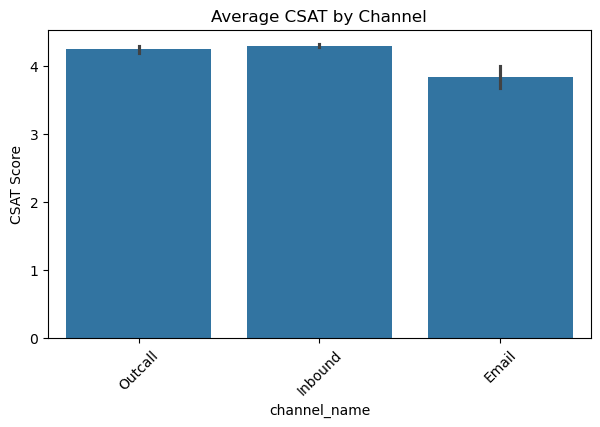

In [18]:
plt.figure(figsize=(7,4))
sns.barplot(
    x='channel_name',
    y='CSAT Score',
    data=df,
    estimator=np.mean
)
plt.xticks(rotation=45)
plt.title('Average CSAT by Channel')
plt.show()

Average CSAT Score by Agent Shift

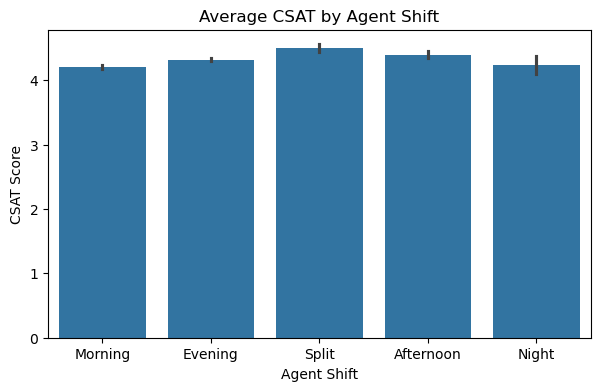

In [19]:
plt.figure(figsize=(7,4))
sns.barplot(
    x='Agent Shift',
    y='CSAT Score',
    data=df,
    estimator=np.mean
)
plt.title('Average CSAT by Agent Shift')
plt.show()

Average CSAT Score by Agent Tenure

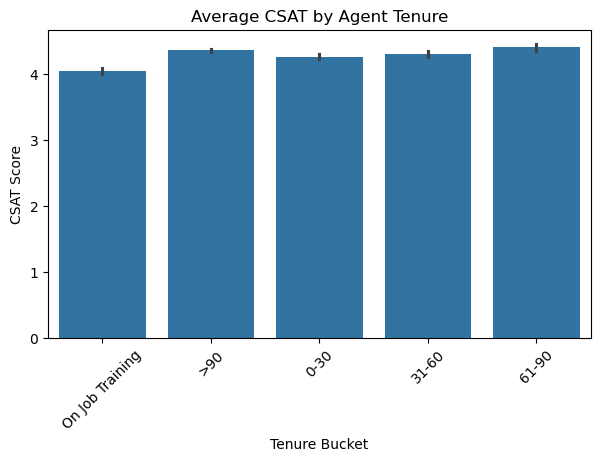

In [20]:
plt.figure(figsize=(7,4))
sns.barplot(
    x='Tenure Bucket',
    y='CSAT Score',
    data=df,
    estimator=np.mean
)
plt.xticks(rotation=45)
plt.title('Average CSAT by Agent Tenure')
plt.show()

Relationship between Response Delay and CSAT Score

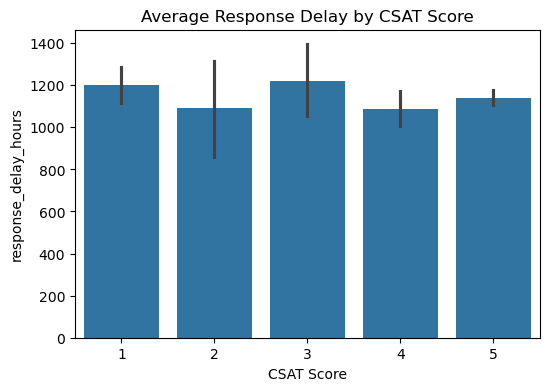

In [21]:
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], errors='coerce')
df['Survey_response_Date'] = pd.to_datetime(df['Survey_response_Date'], errors='coerce')

df['response_delay_hours'] = (
    (df['Survey_response_Date'] - df['Issue_reported at'])
    .dt.total_seconds() / 3600
)

plt.figure(figsize=(6,4))
sns.barplot(
    x='CSAT Score',
    y='response_delay_hours',
    data=df,
    estimator=np.mean
)
plt.title('Average Response Delay by CSAT Score')
plt.show()

Feature Enginering

In [22]:
scaler = StandardScaler()
df['Item_price_scaled'] = scaler.fit_transform(df[['Item_price']])
df['handling_time_scaled'] = scaler.fit_transform(df[['connected_handling_time']])

In [23]:
median_price = df['Item_price'].median()
df['high_value_item'] = (df['Item_price'] > median_price).astype(int)
threshold_hours = 48
df['long_response_delay'] = (df['response_delay_hours'] > threshold_hours).astype(int)

In [24]:
le_channel = LabelEncoder()
df['channel_encoded'] = le_channel.fit_transform(df['channel_name'].astype(str))
le_shift = LabelEncoder()
df['agent_shift_encoded'] = le_shift.fit_transform(df['Agent Shift'].astype(str))
le_tenure = LabelEncoder()
df['tenure_bucket_encoded'] = le_tenure.fit_transform(df['Tenure Bucket'].astype(str))

In [25]:
df['order_hour'] = df['order_date_time'].dt.hour.fillna(0).astype(int)
df['day_of_week'] = df['order_date_time'].dt.dayofweek.fillna(0).astype(int)
df['handling_time_bucket'] = pd.cut(df['connected_handling_time'], bins=[0,5,15,df['connected_handling_time'].max()], labels=[0,1,2], include_lowest=True).astype(int)
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
df['high_delay_high_price'] = df['high_value_item'] * df['long_response_delay']

In [26]:
df['order_hour'] = df['order_date_time'].dt.hour.fillna(0).astype(int)
df['day_of_week'] = df['order_date_time'].dt.dayofweek.fillna(0).astype(int)

df['handling_time_bucket'] = pd.cut(
    df['connected_handling_time'],
    bins=[0,5,15,df['connected_handling_time'].max()],
    labels=[0,1,2],
    include_lowest=True
).astype(int)

In [27]:
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x>=5 else 0)
df['high_delay_high_price'] = df['high_value_item'] * df['long_response_delay']

In [28]:
df['issue_responded_dt'] = pd.to_datetime(
    df['issue_responded'],
    dayfirst=True,
    errors='coerce'
)

df['issue_reported_dt'] = pd.to_datetime(
    df['Issue_reported at'],
    dayfirst=True,
    errors='coerce'
)

df['response_time_minutes'] = (
    df['issue_responded_dt'] - df['issue_reported_dt']
).dt.total_seconds() / 60

df['response_time_minutes'] = df['response_time_minutes'].clip(lower=0)
df['response_time_minutes'] = df['response_time_minutes'].fillna(
    df['response_time_minutes'].median()
)

Modeling

In [29]:
feature_cols = [
    'response_time_minutes',
    'Item_price_scaled',
    'handling_time_scaled',
    'high_value_item',
    'long_response_delay',
    'channel_encoded',
    'agent_shift_encoded',
    'tenure_bucket_encoded',
    'order_hour',
    'handling_time_bucket',
    'day_of_week',
    'is_weekend',
    'high_delay_high_price'
]

X = df[feature_cols].fillna(0)
y = df['CSAT Score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Random forest Approach

In [30]:
print(Counter(y_train))

Counter({5: 13598, 4: 2445, 1: 2340, 3: 578, 2: 280})


In [31]:
smote = SMOTE(
    random_state=42,
    sampling_strategy={
        1: 3000,
        2: 800,
        3: 1000,
        4: 3000
    }
)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

rf = RandomForestClassifier(
    random_state=42,
    n_estimators=400,
    max_depth=30,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt'
)

rf.fit(X_train_res, y_train_res)

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

pred_counts = pd.Series(y_pred).value_counts().sort_index()
print("\nPredicted class counts:\n", pred_counts)

Accuracy: 0.6838495115360632

Classification Report:
               precision    recall  f1-score   support

           1       0.22      0.05      0.08       585
           2       0.00      0.00      0.00        70
           3       0.00      0.00      0.00       144
           4       0.12      0.02      0.03       612
           5       0.71      0.96      0.82      3400

    accuracy                           0.68      4811
   macro avg       0.21      0.20      0.19      4811
weighted avg       0.55      0.68      0.59      4811


Predicted class counts:
 1     131
2      19
3      21
4      89
5    4551
Name: count, dtype: int64


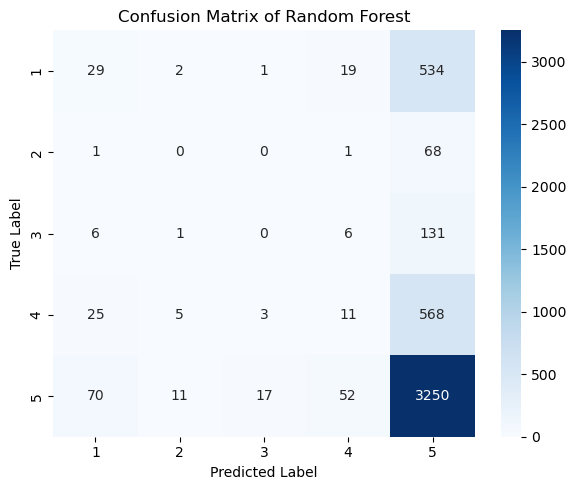

In [32]:
cm_rf = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm_rf,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=sorted(y.unique()),
    yticklabels=sorted(y.unique())
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of Random Forest")
plt.tight_layout()
plt.show()

Gradient Boosting Classifier Approach

In [33]:
smote = SMOTE(
    random_state=42,
    sampling_strategy={
        1: 3000,   
        2: 1000,
        3: 1000,
        4: 3000
    }
)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

gb = GradientBoostingClassifier(random_state=42)

param_dist_gb = {
    'n_estimators': [300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0]
}

gb_random = RandomizedSearchCV(
    gb,
    param_distributions=param_dist_gb,
    n_iter=10,
    cv=3,
    scoring='f1_macro',
    random_state=42,
    n_jobs=-1,
    verbose=2
)

gb_random.fit(X_train_res, y_train_res)

best_gb = gb_random.best_estimator_

y_pred_gb = best_gb.predict(X_test)

print("Best Params GB:", gb_random.best_params_)
print("GB Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))

pred_counts_gb = pd.Series(y_pred_gb).value_counts().sort_index()
print("\nPredicted class counts (GB):\n", pred_counts_gb)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Params GB: {'subsample': 0.8, 'n_estimators': 400, 'max_depth': 10, 'learning_rate': 0.05}
GB Accuracy: 0.6524631053834962

Classification Report:
               precision    recall  f1-score   support

           1       0.19      0.08      0.12       585
           2       0.04      0.03      0.03        70
           3       0.02      0.01      0.01       144
           4       0.12      0.03      0.05       612
           5       0.72      0.90      0.80      3400

    accuracy                           0.65      4811
   macro avg       0.22      0.21      0.20      4811
weighted avg       0.55      0.65      0.59      4811


Predicted class counts (GB):
 1     248
2      53
3      60
4     176
5    4274
Name: count, dtype: int64


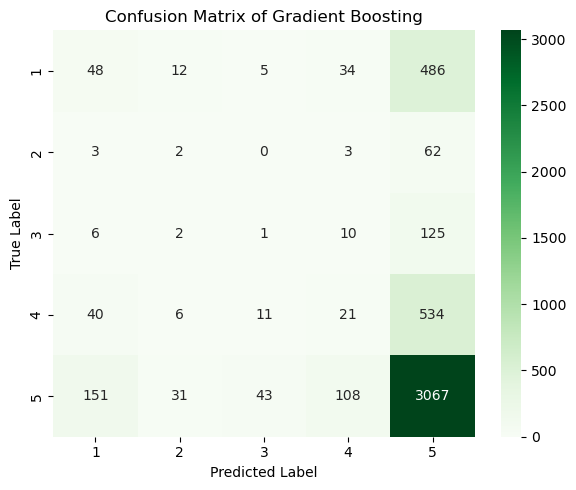

In [34]:
cm_gb = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm_gb,
    annot=True,
    fmt='d',
    cmap='Greens',
    xticklabels=sorted(y.unique()),
    yticklabels=sorted(y.unique())
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of Gradient Boosting")
plt.tight_layout()
plt.show()